In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
apps_with_duplicates =pd.read_csv('apps.csv')

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ',len(apps))

# Print a concise summary of apps dataframe
print(apps.info())

# Have a look at a random sample of n rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1055,1284,BetterMe: Weight Loss Workouts,HEALTH_AND_FITNESS,4.2,14709,15.0,"5,000,000+",Free,0,Everyone,Health & Fitness,"July 26, 2018",2.8.2,5.0 and up
8551,9693,EP,BUSINESS,NaN,3,2.1,100+,Free,0,Everyone,Business,"November 13, 2015",1.0.1,2.3.3 and up
3293,4159,Wrestling Revolution 3D,SPORTS,4.3,989344,51.0,"50,000,000+",Free,0,Teen,Sports,"July 23, 2018",1.64,4.0 and up
2231,2848,"Candy selfie - photo editor, live filter camera",PHOTOGRAPHY,4.4,53421,26.0,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",2.74.685,4.0.3 and up
612,741,Udemy - Online Courses,EDUCATION,4.5,99020,18.0,"1,000,000+",Free,0,Everyone,Education,"August 2, 2018",5.0.4,5.0 and up


In [4]:
chars_to_remove = [',','$','+']
cols_to_clean = ['Installs','Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char,'')
    apps[col] = pd.to_numeric(apps[col]) 

In [7]:
!pip install plotly

Number of categories =  33


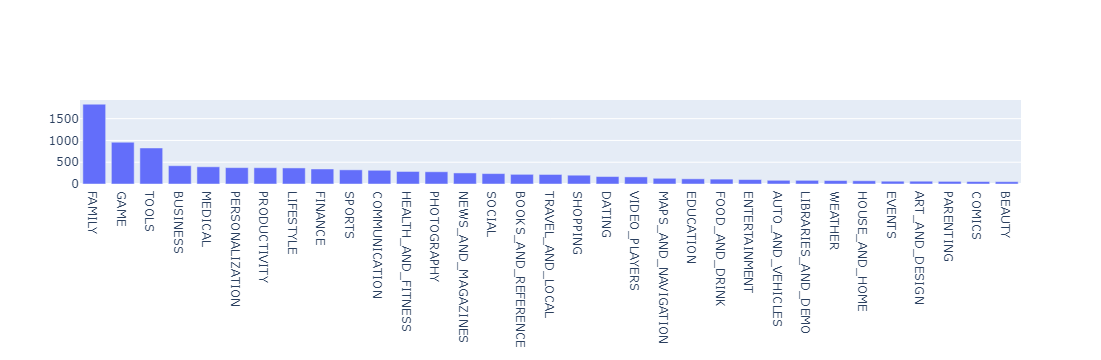

In [19]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, 
        y = num_apps_in_category.values, 
)]

plotly.offline.iplot(data)

Average app rating =  4.173243045387994


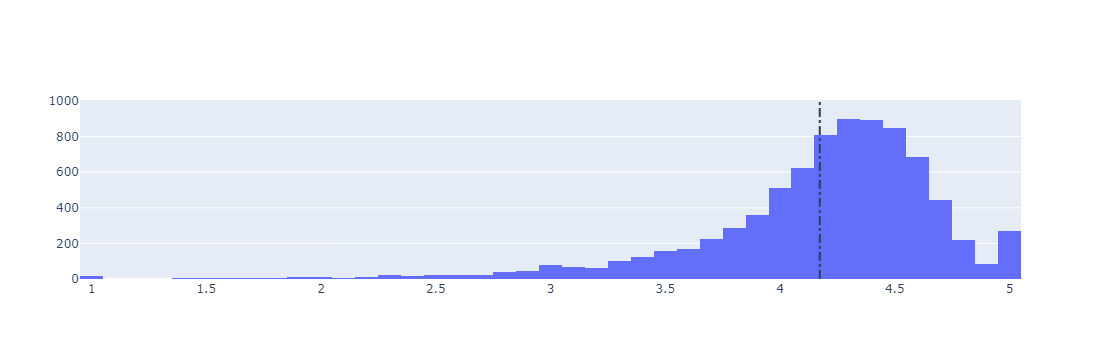

In [10]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ',avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

          Category     a
0           FAMILY  1512
1             GAME   832
2            TOOLS   626
3  PERSONALIZATION   276
4        LIFESTYLE   269
5          MEDICAL   266
6          FINANCE   258


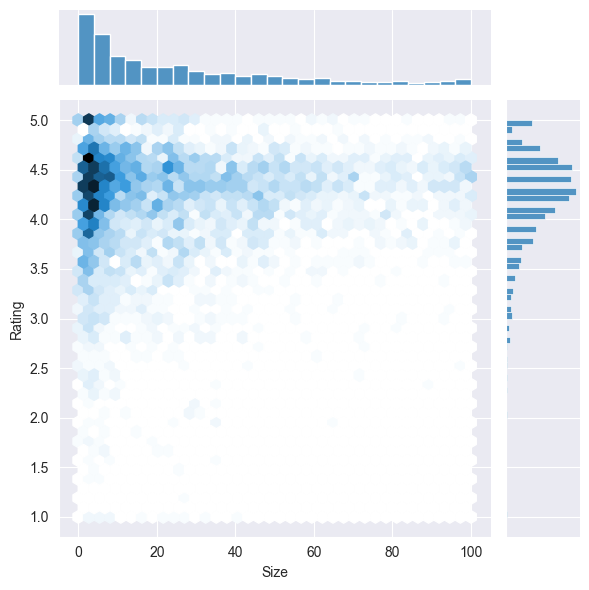

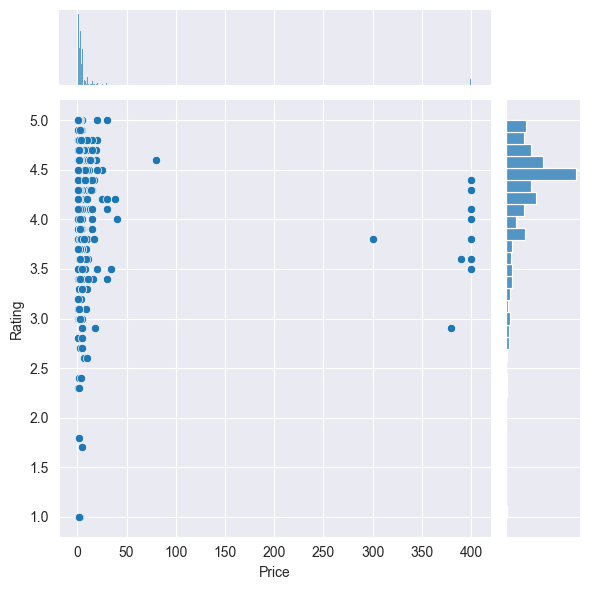

In [11]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")


# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

dfa=apps_with_size_and_rating_present['Category'].value_counts().to_frame(name = 'a')
print(dfa[dfa['a']>=250].reset_index())
# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


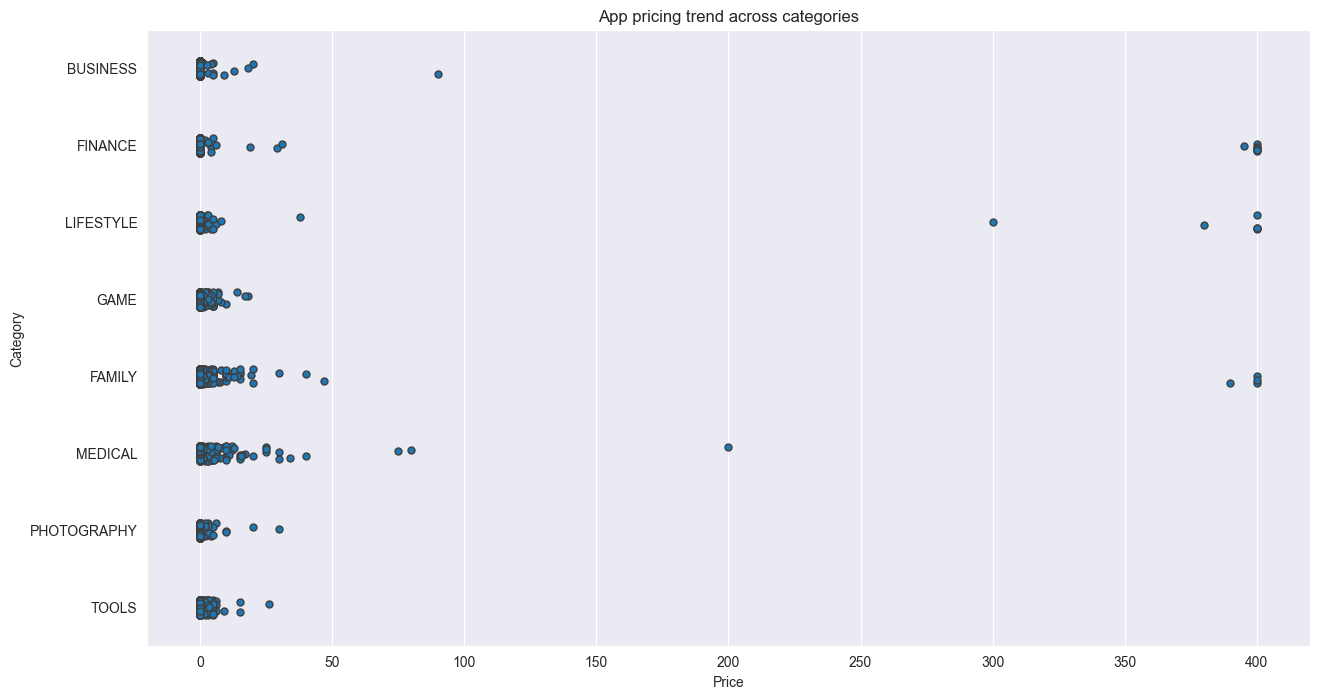

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8) 

# Select a few popular app categories
popular_app_cats = apps[apps["Category"].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x ='Price', y = 'Category',data=popular_app_cats, jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]  
apps_above_200 

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

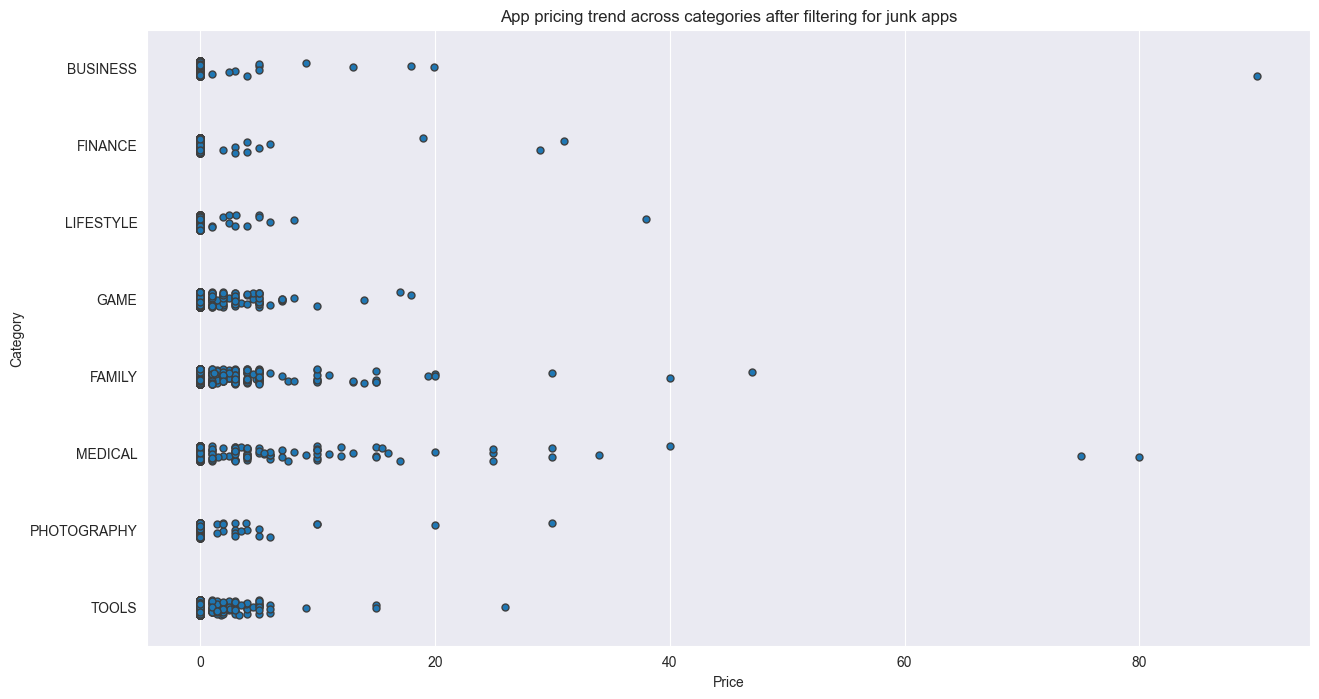

In [13]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8) 

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,jitter=True,linewidth=1)    
ax.set_title('App pricing trend across categories after filtering for junk apps')  

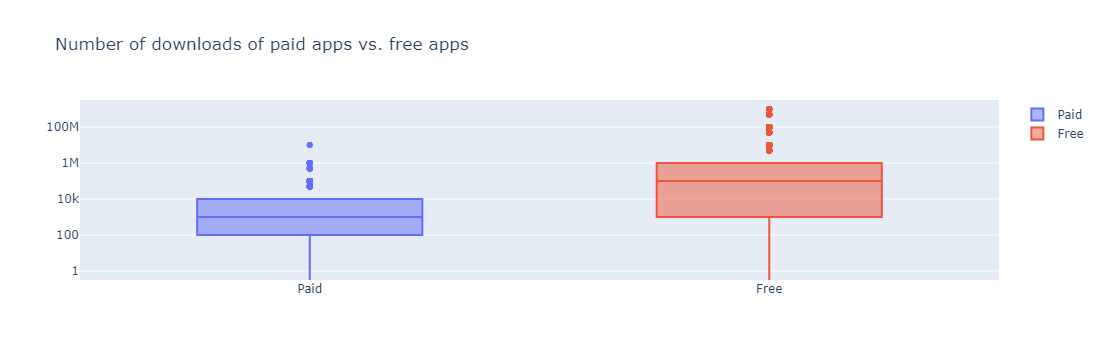

In [16]:
trace0 = go.Box(
    # Data for paid apps
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict( 
         type = 'log'
        )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})  


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61540,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
61546,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
61553,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
61554,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


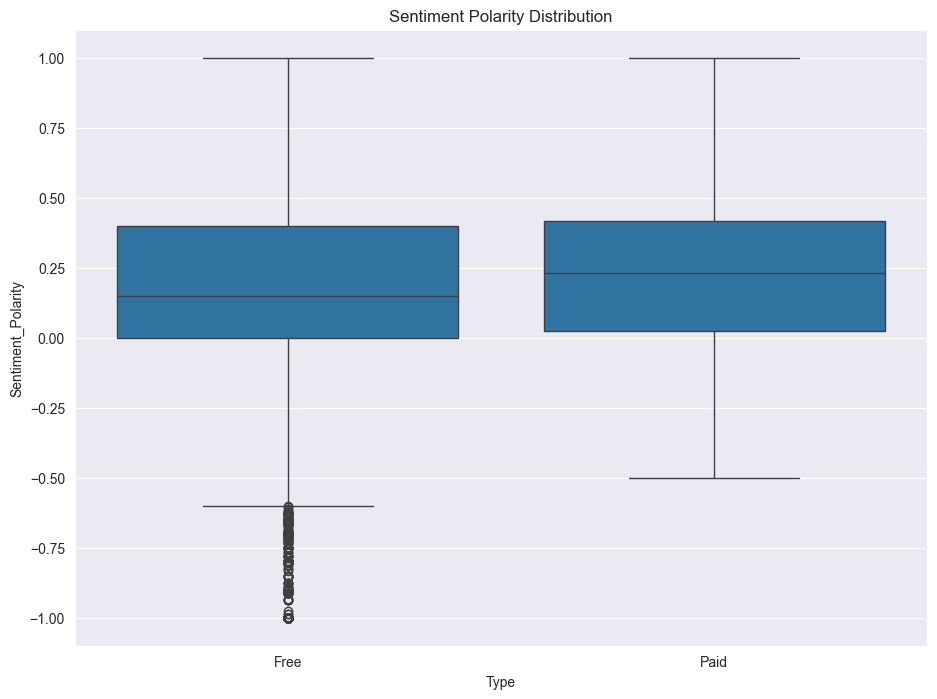

In [18]:
reviews_df = pd.read_csv('user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])


fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
merged_df